## **Home Task: Kaggle Titanic Competition**

In [31]:
import pandas as pd
import seaborn as sns

## EDA

In [32]:
train_file = sns.load_dataset("titanic")

In [33]:
train_file.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [34]:
train_file.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
train_file.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


<AxesSubplot:xlabel='pclass', ylabel='Density'>

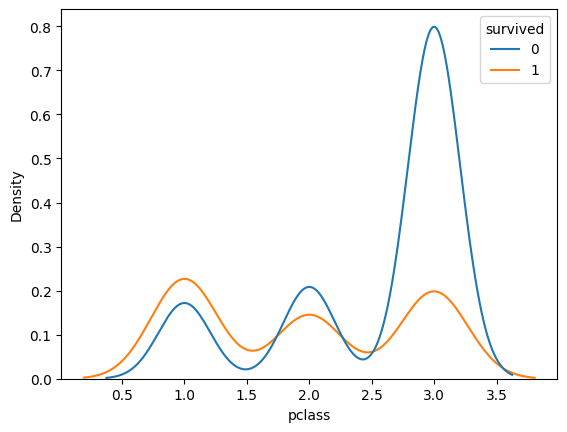

In [36]:
sns.kdeplot(data=train_file, x='pclass', hue='survived')

<AxesSubplot:xlabel='sibsp', ylabel='Density'>

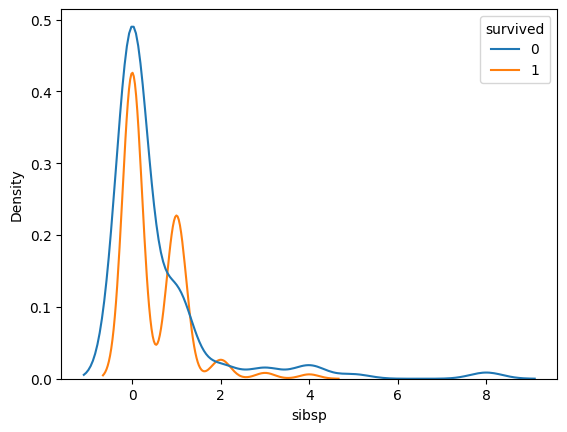

In [37]:
sns.kdeplot(data=train_file, x='sibsp', hue='survived')

<AxesSubplot:xlabel='fare', ylabel='Density'>

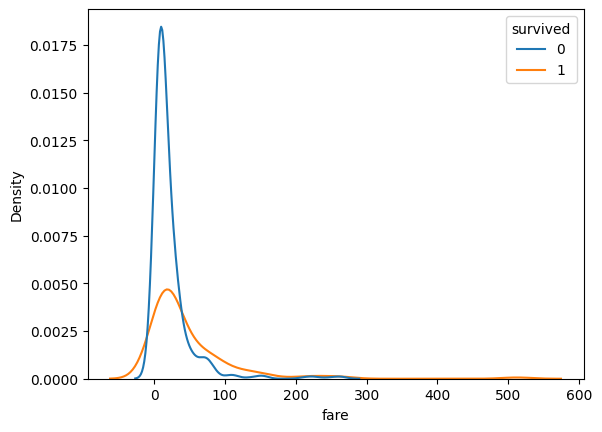

In [38]:
sns.kdeplot(data=train_file, x='fare', hue='survived')

<AxesSubplot:xlabel='sex', ylabel='Count'>

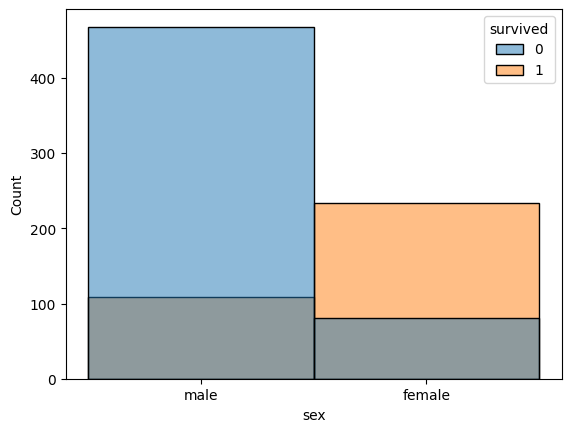

In [39]:
sns.histplot(data=train_file, x='sex', hue='survived')

<AxesSubplot:xlabel='embarked', ylabel='Count'>

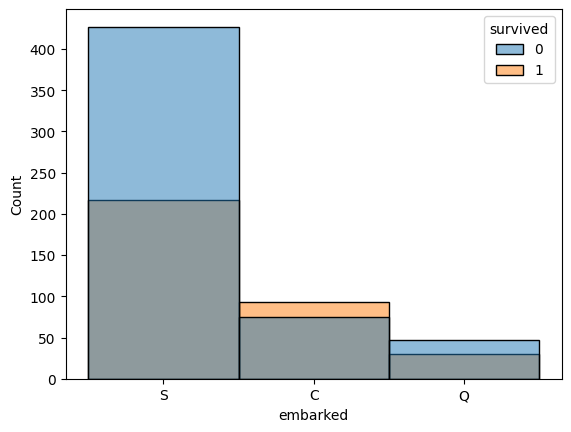

In [40]:
sns.histplot(data=train_file, x='embarked', hue='survived')

## PREPROCESSING

In [41]:
train_data = train_file

mean_age = train_file.age.mean().round()
print(mean_age)

train_data.age = train_data.age.fillna(mean_age)

30.0


In [42]:
# train_data['Title'] = train_data.Name.map(lambda x: x.split(',')[1].split('.')[0].strip())
# sub_data['Title'] = sub_data.Name.map(lambda x: x.split(', ')[1].split('. ')[0].strip())

# pd.concat([train_data, sub_data])[['Title', 'Survived']].value_counts()
# # train_data[['Name', 'Title']]

In [43]:
# male_titles = ['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer']
# female_titles = ['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona']

# train_data['Title'].replace(male_titles, 'Mr', inplace=True)
# train_data['Title'].replace(female_titles, 'Miss', inplace=True)

In [44]:
# using 'Title' makes it worse, even if instead of Sex
full_data = pd.get_dummies(train_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']])
X  = full_data[:train_data.shape[0]]

In [45]:
y = train_data.survived
y.head(3)

0    0
1    1
2    1
Name: survived, dtype: int64

## TRAIN TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split

train_X, test_X = train_test_split(X, test_size=0.3, random_state=42)
train_y, test_y = train_test_split(y, test_size=0.3, random_state=42)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(623, 10)
(268, 10)
(623,)
(268,)


## MODEL SELECTION, TRAINING AND VALIDATION

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
model.fit(train_X, train_y)
preds = model.predict(test_X)

score = accuracy_score(test_y, preds)
print(score)

review_data = test_X.join(test_y)
review_data['Prediction'] = preds
review_data

0.8134328358208955


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,survived,Prediction
709,3,30.0,1,1,15.2458,0,1,1,0,0,1,0
439,2,31.0,0,0,10.5000,0,1,0,0,1,0,0
840,3,20.0,0,0,7.9250,0,1,0,0,1,0,0
720,2,6.0,0,1,33.0000,1,0,0,0,1,1,1
39,3,14.0,1,0,11.2417,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
821,3,27.0,0,0,8.6625,0,1,0,0,1,1,0
633,1,30.0,0,0,0.0000,0,1,0,0,1,0,0
456,1,65.0,0,0,26.5500,0,1,0,0,1,0,0
500,3,17.0,0,0,8.6625,0,1,0,0,1,0,0


In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50, 100, 200, 300, 1000],
                'max_depth': [3, 5, 10, 15, 25, 40]}
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(train_X, train_y)

clf.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [50]:
clf.best_score_

0.8282322580645161

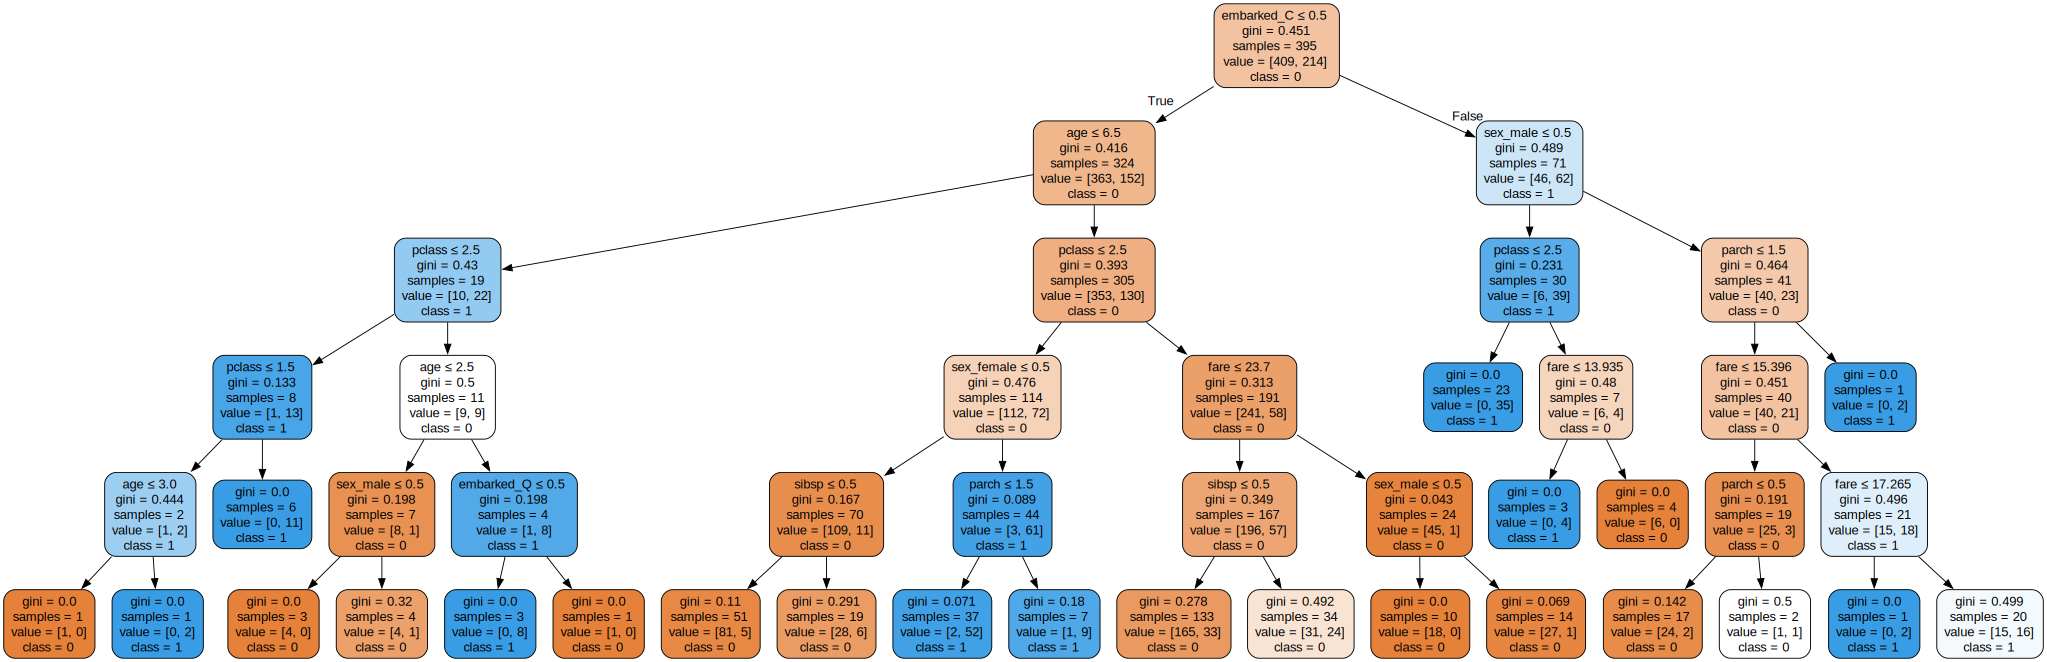

In [49]:
import graphviz  
from sklearn.tree import export_graphviz  
dot_data = export_graphviz(
    model.estimators_[0], 
    out_file = None, 
    feature_names = X.columns,  
    class_names = ['0', '1'],  
    filled = True,
    rounded = True,  
    special_characters = True,
    impurity = True
)
graph = graphviz.Source(dot_data, format='png')  
graph  

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.05, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(train_X, train_y)

preds = model.predict(test_X)

score = accuracy_score(test_y, preds)
print(score)

review_data = test_X.join(test_y)
review_data['Prediction'] = preds
review_data

0.8134328358208955


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,survived,Prediction
709,3,30.0,1,1,15.2458,0,1,1,0,0,1,0
439,2,31.0,0,0,10.5000,0,1,0,0,1,0,0
840,3,20.0,0,0,7.9250,0,1,0,0,1,0,0
720,2,6.0,0,1,33.0000,1,0,0,0,1,1,1
39,3,14.0,1,0,11.2417,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
821,3,27.0,0,0,8.6625,0,1,0,0,1,1,0
633,1,30.0,0,0,0.0000,0,1,0,0,1,0,0
456,1,65.0,0,0,26.5500,0,1,0,0,1,0,0
500,3,17.0,0,0,8.6625,0,1,0,0,1,0,0


In [52]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate=0.03, n_estimators=1000,
                   max_depth= 4, min_child_weight= 2, 
                   colsample_bytree= 0.5, gamma= 1, 
                   reg_alpha= 0.01, subsample= 0.4).fit(train_X, train_y)

preds = model.predict(test_X)

score = accuracy_score(test_y, preds)
print(score)

review_data = test_X.join(test_y)
review_data['Prediction'] = preds
review_data

0.8246268656716418


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,survived,Prediction
709,3,30.0,1,1,15.2458,0,1,1,0,0,1,0
439,2,31.0,0,0,10.5000,0,1,0,0,1,0,0
840,3,20.0,0,0,7.9250,0,1,0,0,1,0,0
720,2,6.0,0,1,33.0000,1,0,0,0,1,1,1
39,3,14.0,1,0,11.2417,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
821,3,27.0,0,0,8.6625,0,1,0,0,1,1,0
633,1,30.0,0,0,0.0000,0,1,0,0,1,0,0
456,1,65.0,0,0,26.5500,0,1,0,0,1,0,0
500,3,17.0,0,0,8.6625,0,1,0,0,1,0,0


In [54]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

parameters = {
            'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [100, 500, 1000],
              'max_depth': [1, 2, 3, 5],
              'min_child_weight': [1, 3, 5],
              'gamma': [0, 0.1, 0.2],
              'subsample': [0.5, 0.6],
              'colsample_bytree': [0.5, 0.6],
              'reg_alpha': [0.1, 1.0, 10]
            }

clf = GridSearchCV(xgb_model, parameters, cv=5, n_jobs=-1)
clf.fit(train_X, train_y)
  
clf.best_params_, clf.best_score_


({'colsample_bytree': 0.5,
  'gamma': 0.2,
  'learning_rate': 0.1,
  'max_depth': 5,
  'min_child_weight': 3,
  'n_estimators': 100,
  'reg_alpha': 0.1,
  'subsample': 0.6},
 0.8378838709677421)

In [55]:
preds = clf.predict(test_X)

score = accuracy_score(test_y, preds)
print(score)

review_data = test_X.join(test_y)
review_data['Prediction'] = preds
review_data

0.8208955223880597


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,survived,Prediction
709,3,30.0,1,1,15.2458,0,1,1,0,0,1,0
439,2,31.0,0,0,10.5000,0,1,0,0,1,0,0
840,3,20.0,0,0,7.9250,0,1,0,0,1,0,0
720,2,6.0,0,1,33.0000,1,0,0,0,1,1,1
39,3,14.0,1,0,11.2417,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
821,3,27.0,0,0,8.6625,0,1,0,0,1,1,0
633,1,30.0,0,0,0.0000,0,1,0,0,1,0,0
456,1,65.0,0,0,26.5500,0,1,0,0,1,0,0
500,3,17.0,0,0,8.6625,0,1,0,0,1,0,0


## FINAL MODEL

In [56]:
final_model = xgb.XGBClassifier(**clf.best_params_, random_state=42)
final_model.fit(X, y)
# final_preds = final_model.predict(sub_X)

# submission = pd.DataFrame({'PassengerId': sub_data.PassengerId, 'Survived': final_preds})
# submission.to_csv('submission.csv', index=False) 
# print(submission)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)